In [1]:
using Random
using Plots
using LinearAlgebra
using Distributions
using CSV
using DataFrames

### Functions

In [2]:
function perceptron_learning_rule(X, y, epochs=10, learning_rate=0.01)

    n, p = size(X)
    d = Uniform(-1,1)
    weight_vec = rand(d, p+1)               # Initialize the weights using random values
    perceptron_updates = Perceptron[]
    cost = 10000
    push!(perceptron_updates, Perceptron(weight_vec, cost))
    best_model = perceptron_updates[end]
    t = 0

    while cost > 0 && t < epochs

        running_cost = 0

        for i=1:n

            # calculate the predictions using the model parameters
            weight_vec_prev = weight_vec
            y_hat = predict(weight_vec, X[i,:])

            # update the parameters using the data
            weight_vec[1] = weight_vec_prev[1] + learning_rate * (y[i] - y_hat)
            for j = 1:p
                weight_vec[j+1] = weight_vec_prev[j+1] + learning_rate * (y[i] - y_hat) * X[i,j]
            end

            running_cost = running_cost + abs(y[i] - y_hat)
        end

        cost = running_cost
        push!(perceptron_updates, Perceptron(weight_vec, cost))

        if best_model.cost > cost
            best_model = perceptron_updates[end]
        end

        t = t + 1
    end

    return best_model
end

perceptron_learning_rule (generic function with 3 methods)

In [3]:
struct Perceptron
    weights::Vector{Real}
    cost::Real
end

function signum(z)

    if z >= 0
        return 1
    end

    return -1
end

function predict(weights, x)
    return signum(dot(x, weights[2:end]) + weights[1])
end

function predict(predictor::Perceptron, x)
    return signum(dot(x, predictor.weights[2:end]) + predictor.weights[1])
end

function misclassification_rate(y_true, y_pred)
    misclassifications = []
    for i=1:length(y_true)
        if y_true[i] == y_pred[i]
            push!(misclassifications, 0)
        else
            push!(misclassifications, 1)
        end
    end
    return sum(misclassifications)/length(y_true)
end

function dec_boundary(X, y, perceptron)
    w = perceptron.weights
    slope =  -(w[1]/w[3]) / (w[1]/w[2])
    intercept = -w[1]/w[3]

    decision_boundary(x) = (slope * x) + intercept

    y_preds = [predict(perceptron, X[i,:]) for i = 1:size(X)[1]]
    misclassification = misclassification_rate(y, y_preds) * 100
    # misclassification = round(misclassification, digits=2)
    # println("Misclassification rate: $(misclassification)")

    return decision_boundary, misclassification
end

function sensitivity_analysis(X,y,n=10)
    dec_boundaries = []
    misclassification_rates = []

    for i=1:n
        model = perceptron_learning_rule(X,y)
        boundary, misclassification_rate = dec_boundary(X, y, model)
        push!(dec_boundaries, boundary)
        push!(misclassification_rates, misclassification_rate)
    end

    return dec_boundaries, mean(misclassification_rates)
end

sensitivity_analysis (generic function with 2 methods)

In [4]:
# helper functions -------------------

function plot_sensitivity_analysis(X, y, dec_boundaries, avg_misclassification)
    scatter(X[:,1], X[:,2], group=y, label="")
    plot!(dec_boundaries[1], label="Average MR: $(avg_misclassification)%", legend=:topright)

    for bound in dec_boundaries[2:end]
        plot!(bound, label="")
    end

    display(plot!())
end

function plot_decision_boundary(X, y, (dec_boundary, misclassification))
    scatter(X[:,1], X[:,2], group=y, label = "")
    plot!(dec_boundary, label="MR: $(misclassification)%", legend=:topright)
    display(plot!())
end

plot_decision_boundary (generic function with 1 method)

# Instructions

You need to implement two functions:
 - dec_boundary: this function finds the decision boundary of the perceptron based on the weights derived by the model
 - sensitivity_analysis: this function uses the dec_boundary to replicate N trainings. Thus, it shows the AVERAGE MISCLASSIFICATION RATE of all the training replications and the decision boundaries for each training replication. You are left to decide how many replications you are going to perform to determine the model's stability.

## Problem 1

### Importing Dataset

In [5]:
dataset_1 = CSV.read("problem_1.csv", DataFrame)

2000×3 DataFrame
  Row │ X1        X2        Class   
      │ Float64   Float64   Float64 
──────┼─────────────────────────────
    1 │  9.26771   6.09835     -1.0
    2 │  5.02924   7.37299      1.0
    3 │  5.16104  10.6784       1.0
    4 │  4.02353  10.0947       1.0
    5 │ 11.1768    3.83397     -1.0
    6 │  9.78434   5.58006     -1.0
    7 │  4.90465   9.3467       1.0
    8 │  8.98247   6.6066      -1.0
  ⋮   │    ⋮         ⋮         ⋮
 1994 │ 10.2628    6.15064     -1.0
 1995 │  7.79376   5.02825     -1.0
 1996 │  3.52438  10.0931       1.0
 1997 │  5.68399  11.9034       1.0
 1998 │  9.3957    5.44564     -1.0
 1999 │  9.80935   2.99861     -1.0
 2000 │ 10.2182    6.08159     -1.0
                   1985 rows omitted

### Model Training

In [6]:
X_1 = dataset_1[:,1:2]
y_1 = dataset_1[:,end]
perceptron_model_1 =  perceptron_learning_rule(X_1, y_1)

Perceptron(Real[0.17550830730143727, -0.21702768280549206, 0.20618909878053265], 0.0)

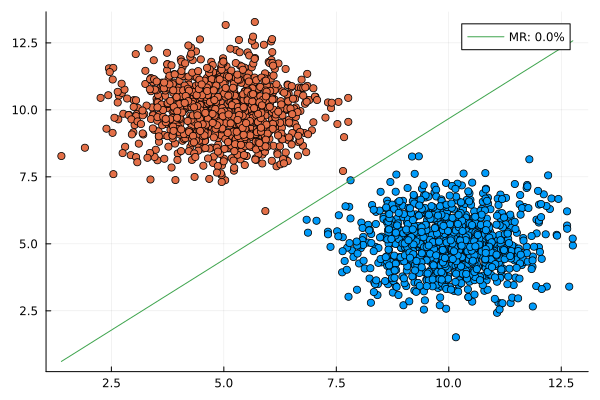

In [7]:
plot_decision_boundary(X_1, y_1, dec_boundary(X_1, y_1, perceptron_model_1))

### Sensitivity Analysis

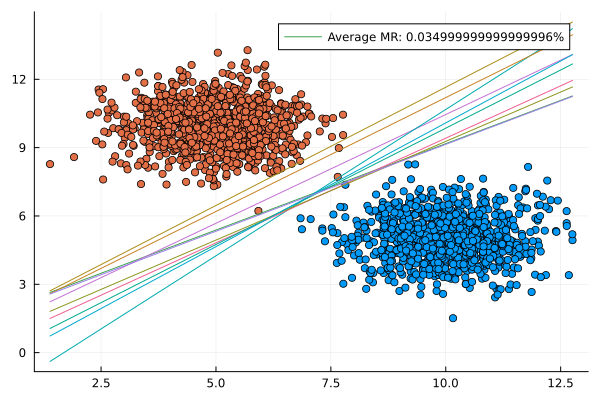

In [8]:
dec_boundaries, avg_misclassification = sensitivity_analysis(X_1,y_1)
plot_sensitivity_analysis(X_1, y_1, dec_boundaries, avg_misclassification)

## Problem 2

### Importing Dataset

In [9]:
dataset_2 = CSV.read("problem_2.csv", DataFrame)

2000×3 DataFrame
  Row │ X1        X2        Class   
      │ Float64   Float64   Float64 
──────┼─────────────────────────────
    1 │  7.99094  13.6628      -1.0
    2 │ 14.8708   10.927        1.0
    3 │  9.27359  13.5918      -1.0
    4 │  9.60728  14.4627      -1.0
    5 │ 14.704     8.69325      1.0
    6 │ 18.8638   10.9705       1.0
    7 │ 10.4273   15.3353      -1.0
    8 │ 13.1795   13.4864       1.0
  ⋮   │    ⋮         ⋮         ⋮
 1994 │ 13.0113   10.0031       1.0
 1995 │ 10.0092   14.6155      -1.0
 1996 │ 18.9903   12.3222       1.0
 1997 │ 11.1478   15.0483      -1.0
 1998 │ 16.0809    8.81849      1.0
 1999 │ 14.7989    6.94861      1.0
 2000 │  8.38588  15.5027      -1.0
                   1985 rows omitted

## Model Training

In [10]:
X_2 = dataset_2[:,1:2]
y_2 = dataset_2[:,end]
perceptron_model_2 =  perceptron_learning_rule(X_2, y_2)

Perceptron(Real[-0.7963357159764914, 1.2957709603729062, -1.1242211929937926], 0.0)

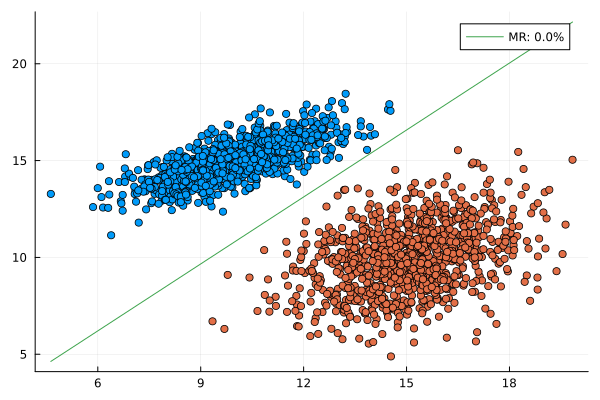

In [11]:
plot_decision_boundary(X_2, y_2, dec_boundary(X_2, y_2, perceptron_model_2))

### Sensitivity Analysis

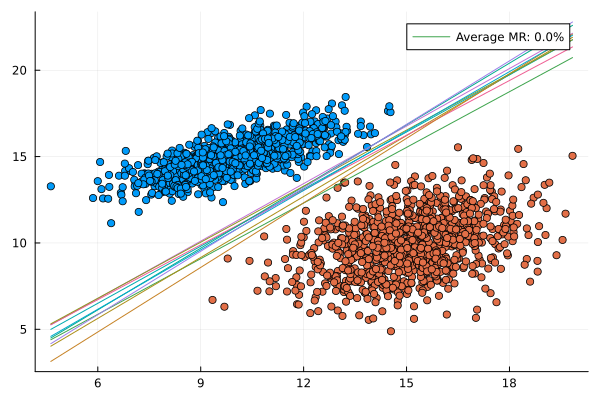

In [12]:
dec_boundaries, avg_misclassification = sensitivity_analysis(X_2,y_2)
plot_sensitivity_analysis(X_2, y_2, dec_boundaries, avg_misclassification)

## Problem 3

### Importing Dataset

In [13]:
dataset_3 = CSV.read("problem_3.csv", DataFrame)

2000×3 DataFrame
  Row │ X1         X2        Class   
      │ Float64    Float64   Float64 
──────┼──────────────────────────────
    1 │  2.84882    8.20517     -1.0
    2 │  0.806525   8.34535     -1.0
    3 │ 15.7209     4.25458      1.0
    4 │ 17.5105     3.7684       1.0
    5 │ 14.6863     1.5843       1.0
    6 │ 16.3605     2.75231      1.0
    7 │  1.78845   10.6771      -1.0
    8 │  3.85062   10.2262      -1.0
  ⋮   │     ⋮         ⋮         ⋮
 1994 │  2.1035     7.18387     -1.0
 1995 │ 16.3205     1.79306      1.0
 1996 │  3.50695    8.52361     -1.0
 1997 │ 13.5481     2.58137      1.0
 1998 │ 16.4307     2.95545      1.0
 1999 │ 16.7514     1.46454      1.0
 2000 │  3.13791    9.22915     -1.0
                    1985 rows omitted

### Model Training

In [14]:
X_3 = dataset_3[:,1:2]
y_3 = dataset_3[:,end]
perceptron_model_3 =  perceptron_learning_rule(X_3, y_3)

Perceptron(Real[0.3957946698754411, 0.08079540479371525, -0.20017202561097633], 0.0)

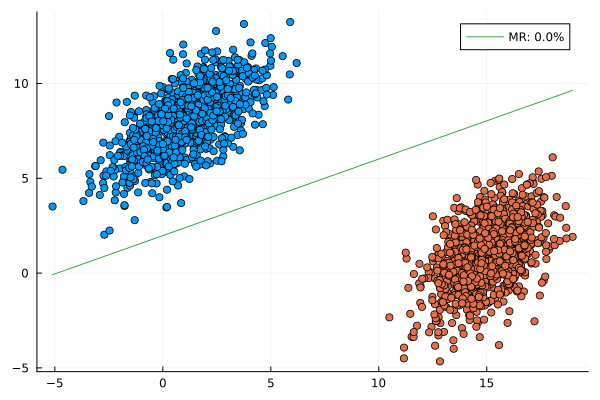

In [15]:
plot_decision_boundary(X_3, y_3, dec_boundary(X_3, y_3, perceptron_model_3))

### Sensitivity Analysis

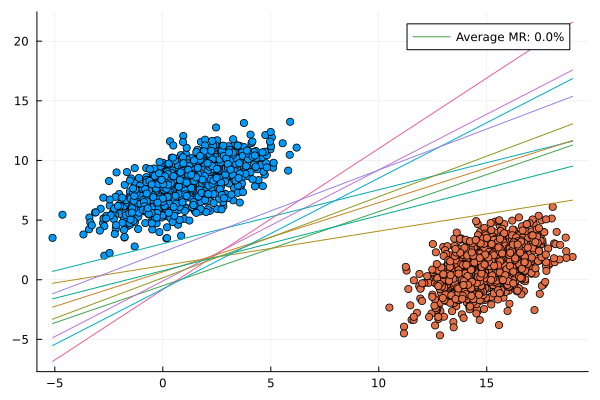

In [16]:
dec_boundaries, avg_misclassification = sensitivity_analysis(X_3,y_3)
plot_sensitivity_analysis(X_3, y_3, dec_boundaries, avg_misclassification)